# Calculations on bike sales

In [2]:
import pandas as pd

df = pd.read_csv("../../data/Sales.csv", index_col=0, parse_dates=True)
df.head()




,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113036 entries, 2013-11-26 to 2016-03-04
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               113036 non-null  int64 
 1   Month             113036 non-null  object
 2   Year              113036 non-null  int64 
 3   Customer_Age      113036 non-null  int64 
 4   Age_Group         113036 non-null  object
 5   Customer_Gender   113036 non-null  object
 6   Country           113036 non-null  object
 7   State             113036 non-null  object
 8   Product_Category  113036 non-null  object
 9   Sub_Category      113036 non-null  object
 10  Product           113036 non-null  object
 11  Order_Quantity    113036 non-null  int64 
 12  Unit_Cost         113036 non-null  int64 
 13  Unit_Price        113036 non-null  int64 
 14  Profit            113036 non-null  int64 
 15  Cost              113036 non-null  int64 
 16  Revenue           1130

In [13]:
countries = df["Country"].unique()
print(countries)

total_revenue = df["Revenue"].sum()
message = f"The total revenue in american dollars is:"
print(message,"$",total_revenue)


['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom']
The total revenue in american dollars is: $ 85271008


In [22]:
categories_list= df["Product_Category"].unique()
print(categories_list)

['Accessories' 'Clothing' 'Bikes']


In [28]:
revenue_per_category = df.groupby("Product_Category")["Revenue"].sum()
print(revenue_per_category)

Product_Category
Accessories    15117992
Bikes          61782134
Clothing        8370882
Name: Revenue, dtype: int64


In [29]:
print(df.columns.tolist())


['Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


In [49]:
revenue_per_gender = df.groupby("Customer_Gender")["Revenue"].sum()
print(revenue_per_gender)

Customer_Gender
F    41935599
M    43335409
Name: Revenue, dtype: int64


In [50]:
profit_per_country = df.groupby("Country")["Profit"].sum()
print(profit_per_country)
sorted_revenue_per_country = profit_per_country.sort_values(ascending=False)
print(sorted_revenue_per_country)

Country
Australia          6776030
Canada             3717296
France             2880282
Germany            3359995
United Kingdom     4413853
United States     11073644
Name: Profit, dtype: int64
Country
United States     11073644
Australia          6776030
United Kingdom     4413853
Canada             3717296
Germany            3359995
France             2880282
Name: Profit, dtype: int64


In [62]:
best_profit_product = df.groupby("Product")["Profit"].sum().sort_values(ascending=False)
print(best_profit_product.head(10))

Product
Mountain-200 Black, 38     1310464
Road-150 Red, 62           1243755
Mountain-200 Silver, 42    1231452
Sport-100 Helmet, Red      1191402
Mountain-200 Silver, 38    1165560
Sport-100 Helmet, Black    1141330
Mountain-200 Black, 46     1080672
Road-150 Red, 52           1053260
Sport-100 Helmet, Blue     1048446
Mountain-200 Black, 42     1036542
Name: Profit, dtype: int64


In [53]:
profit_per_month = df.groupby("Month")["Profit"].sum().sort_values(ascending=False)
print(profit_per_month)

Month
December     3409712
June         3383583
May          3326937
April        2864719
March        2761866
January      2618521
February     2562322
November     2388513
October      2301312
September    2249661
August       2214204
July         2139750
Name: Profit, dtype: int64


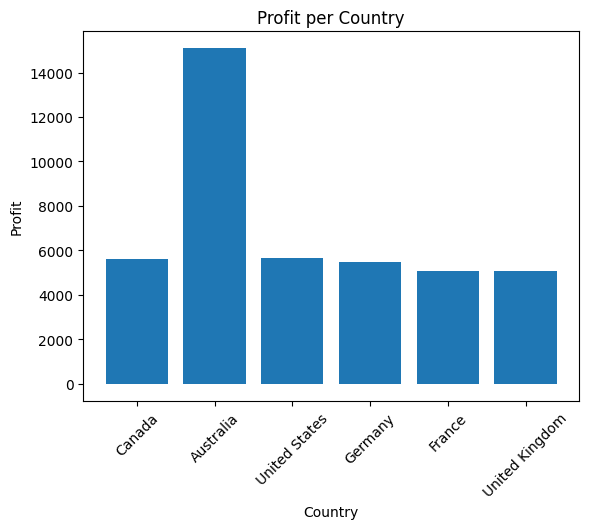

In [58]:
import matplotlib.pyplot as plt

plt.bar(df['Country'], df['Profit'])
plt.title('Profit per Country')
plt.xlabel('Country')
plt.ylabel('Profit in USD')
plt.xticks(rotation=45)
plt.show()

In [70]:
df.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
Day,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Year,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,11.901660,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0
Profit,285.051665,453.887443,-30.0,29.0,101.0,358.0,15096.0
Cost,469.318695,884.866118,1.0,28.0,108.0,432.0,42978.0
Revenue,754.370360,1309.094674,2.0,63.0,223.0,800.0,58074.0


In [ ]:
df[["Country", "Profit"]].groupby(["Country"]).sum(numeric_only=True).sort_values(
    by="Profit", ascending=False
).reset_index()

,Country,Profit
0,United States,11073644
1,Australia,6776030
2,United Kingdom,4413853
3,Canada,3717296
4,Germany,3359995
5,France,2880282


In [72]:
import duckdb

duckdb.query(
    """
    SELECT *
    FROM df
"""
).df()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [74]:
import duckdb

duckdb.query(
    """
    SELECT
        country,
        SUM(profit) AS Total_profit
    FROM df
    GROUP BY
        country
    ORDER BY
        Total_profit DESC
"""
).df()

,Country,Total_profit
0,United States,11073644.0
1,Australia,6776030.0
2,United Kingdom,4413853.0
3,Canada,3717296.0
4,Germany,3359995.0
5,France,2880282.0


In [78]:
import duckdb

df_profit = duckdb.query(
    """
    SELECT
        Country,
        SUM(Profit) AS Total_profit,
        AVG(Profit) AS Avg_profit,
        MEDIAN(Profit) AS Median_profit
    FROM df
    GROUP BY Country
    ORDER BY Total_profit DESC, Avg_profit DESC, Median_profit DESC
    """
).df()


[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Total Profit'),
 Text(0.5, 1.0, 'Total profit per country')]

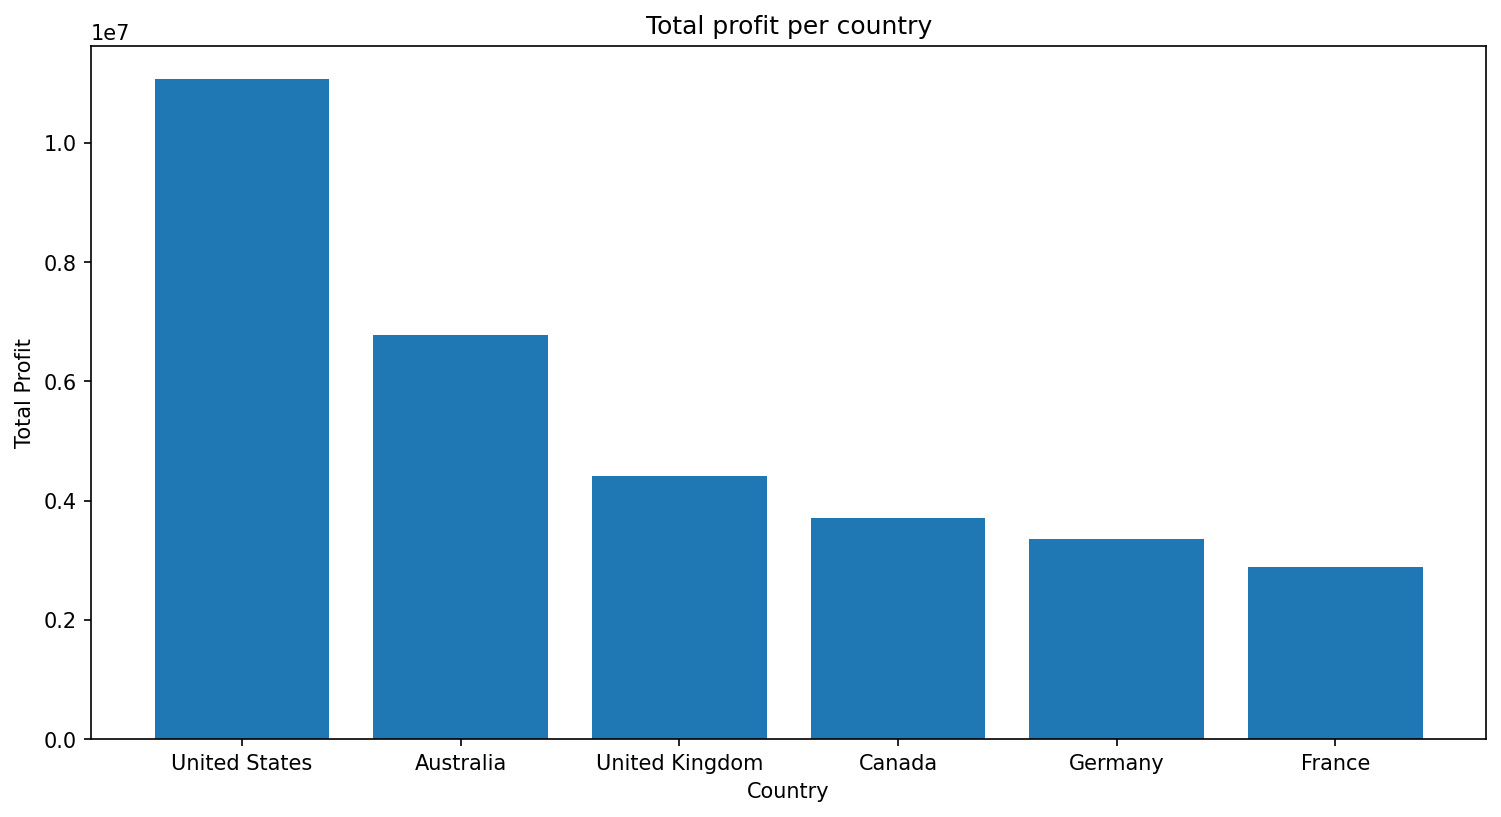

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(12, 6), dpi=150)

ax.bar(x=df_profit["Country"], height=df_profit["Total_profit"])
ax.set(xlabel="Country", ylabel="Total Profit", title="Total profit per country")